### ***Decision Tree***

In [70]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
excel = "Dataset.xlsx"

# *Test Decision Tree model here!!*

In [71]:
def importdata(excel):
    #import attribute
    data = pd.read_excel(excel, index_col=None, header=1)
    x = data.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = data.iloc[:, 9]
    y = np.array(y)
    return x, y

def importtest(excel):
    test = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    test = test.iloc[:, 0:9]
    test = np.array(test)
    return test

def DecisionTree(excel, i, depth):
    x, y = importdata(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=2)
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    return pred, y_test

def DecisionTree_test(excel, i, depth):
    x, y = importdata(excel)
    test = importtest(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=2)
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(x_train,y_train)
    pred = clf.predict(test)
    return pred

#### Train model here!

In [72]:
y_pred, y_test = DecisionTree(excel, 0.2, 7)
metrics.accuracy_score(y_test, y_pred)

0.9442231075697212

#### Use model here!

In [77]:
pred = DecisionTree_test(excel, 0.2, 7)
len(pred)

100

#### put optimal predicted value into testing set (DO NOT RUN)

In [97]:
excel="Dataset.xlsx"
from openpyxl import load_workbook
book = load_workbook(excel)
sheet = book['test']
for i in range(0, len(pred)):
    sheet.cell(row=i+3, column=10, value=pred[i])
book.save("Dataset_finalresult.xlsx")

# *Interpretation (Do NOT RUN) !!*

### Import training set

In [2]:
def importdata(excel):
    #import attribute
    data = pd.read_excel(excel, index_col=None, header=1)
    x = data.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = data.iloc[:, 9]
    y = np.array(y)
    return x, y

### Import testing set

In [10]:
def importtest(excel):
    test = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    test = test.iloc[:, 0:9]
    test = np.array(test)
    return test

### Dividing dataset

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Create a decision Tree model

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

### ***Experiment Result***

**choose the optimal maximum depth**

In [17]:
def DecisionTree(excel, i, depth):
    x_val, y_val = importdata(excel)
    #test = importtest(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=2)
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf = clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    return pred, y_test

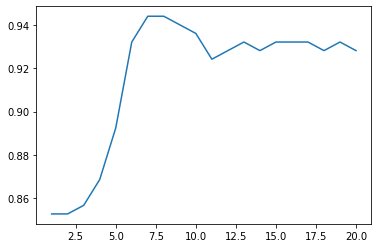

In [18]:
accu = []
horz = []
for i in range(1,21):
    pred, y_test = DecisionTree(excel, 0.2, i)
    ac = metrics.accuracy_score(y_test, pred)
    accu.append(ac)
    horz.append(i)
plt.plot(horz, accu)
#when max_depth=7, the classifier is the most accurate and stable.

**best splitting point**

,splitting,accuracy
0,0.10,0.920635
1,0.15,0.936170
2,0.20,0.944223
3,0.25,0.917197
4,0.30,0.901596
5,0.35,0.906606
6,0.40,0.862550


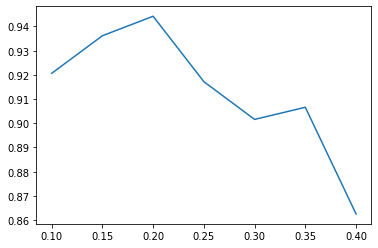

In [29]:
accu = []
horz = []
for sp in np.arange(0.1, 0.4, 0.05):
    pred, y_test = DecisionTree(excel, sp, 7)
    ac = metrics.accuracy_score(y_test, pred)
    accu.append(ac)
    horz.append(sp)
plt.plot(horz, accu, '-')  
data = {'splitting':horz, 'accuracy':accu}
pd.DataFrame(data, index=None)

### ***Accuracy***

In [25]:
y_pred, y_test = DecisionTree(excel, 0.2, 7)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='micro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.9442231075697212
[[128   1   4]
 [  1  19   0]
 [  5   3  90]]
Precision:  0.9442231075697212
Recall:  0.9442231075697212
F1-Score:  0.9442231075697212


In [24]:
y_pred, y_test = DecisionTree(excel, 0.2, 7)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.9442231075697212
[[128   1   4]
 [  1  19   0]
 [  5   3  90]]
Precision:  0.9129192152097975
Recall:  0.9435911206587898
F1-Score:  0.926674142786633
